## ML Lab External Exam - SET 2
## Name:G.Yadagiri
## ID:B200593
## Class:CSE_C2

## Dataset Description

<b>Data Set Information:</b>

Car Evaluation dataset evaluates cars according to the following concepts
<ul>
<li><b>buying</b> - buying price
<li><b>maint</b> - price of the maintenance
<li><b>COMFORT</b> - comfort
<li><b>doors</b> - number of doors
<li><b>persons</b> - capacity in terms of persons to carry
<li><b>lug_boot</b> - the size of luggage boot
<li><b>safety</b> - estimated safety of the car
</ul>


<b>Car Acceptance(Output Class):</b>
unacc, acc, good, vgood 

from the given data you need to buid machine learnig model for Car Acceptance 

In [2]:
# Import necessary libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import Dataset - set2_data.csv 


In [5]:
df=pd.read_csv("set2_data.csv")

In [6]:
# Print top 5 and random 5 values - 2 Marks


In [7]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,NaN,vhigh,2,2,med,low,unacc
4,vhigh,NaN,2,2,med,med,unacc


In [8]:
df.sample(5) #for random values from df

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
43,vhigh,vhigh,3,4,big,med,unacc
1053,med,high,5more,2,small,low,unacc
1358,low,vhigh,4,2,big,high,unacc
851,high,low,5more,4,med,high,acc
27,vhigh,vhigh,3,2,small,low,unacc


In [9]:
#Print column names - 1 Marks


In [10]:
print(list(df.columns))

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_acceptability']


In [11]:
#Check the data type of each column - 1 Marks
print(df.dtypes)

buying               object
maint                object
doors                object
persons              object
lug_boot             object
safety               object
car_acceptability    object
dtype: object


In [12]:
#Print number of rows and columns - 1 Mark


In [13]:
print(f'no.of rows in the dataset are {df.shape[0]}\n')
print(f'no.of columns in the dataset are {df.shape[1]}\n')

no.of rows in the dataset are 1728

no.of columns in the dataset are 7



In [14]:
#Print summary statistics of all variables - 1 Mark


In [15]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
count,1727,1726,1728,1727,1727,1727,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,med,low,unacc
freq,432,432,432,576,576,576,1210


In [16]:
#Print the number of missing values in each column - 1 Marks


In [17]:
df.isnull().sum()

buying               1
maint                2
doors                0
persons              1
lug_boot             1
safety               1
car_acceptability    0
dtype: int64

In [18]:
#Impute missing values - Replace missing categorical values with mode and numerical values with mean of the column - 3 Marks
#Print the number of missing values in each column after imputation


In [19]:
df["doors"]=pd.to_numeric(df["doors"],errors='coerce')
df["persons"]=pd.to_numeric(df["persons"],errors='coerce')
df.dtypes

buying                object
maint                 object
doors                float64
persons              float64
lug_boot              object
safety                object
car_acceptability     object
dtype: object

In [20]:
categorical_cols=df.select_dtypes(include=['object']).columns
print(categorical_cols)
print("\n")
numerical_cols=df.select_dtypes(include=['float64']).columns
print(numerical_cols)

Index(['buying', 'maint', 'lug_boot', 'safety', 'car_acceptability'], dtype='object')


Index(['doors', 'persons'], dtype='object')


In [21]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)
    
for col in numerical_cols:
    df[col].fillna(df[col].mean(),inplace=True)

print(df.isnull().sum())

buying               0
maint                0
doors                0
persons              0
lug_boot             0
safety               0
car_acceptability    0
dtype: int64


In [22]:
df.isnull().sum()

buying               0
maint                0
doors                0
persons              0
lug_boot             0
safety               0
car_acceptability    0
dtype: int64

In [23]:
#Print count of each class - 1 Marks


In [31]:
for col in df.columns:
    print(f"{col} count: {df[col].value_counts()}")

buying count: buying
high     433
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint count: maint
high     434
med      432
low      432
vhigh    430
Name: count, dtype: int64
doors count: doors
3.0    864
2.0    432
4.0    432
Name: count, dtype: int64
persons count: persons
2.999131    577
2.000000    576
4.000000    575
Name: count, dtype: int64
lug_boot count: lug_boot
big      577
med      576
small    575
Name: count, dtype: int64
safety count: safety
high    577
low     576
med     575
Name: count, dtype: int64
car_acceptability count: car_acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [25]:
#Plot histogram of values doors column - 1 Marks 


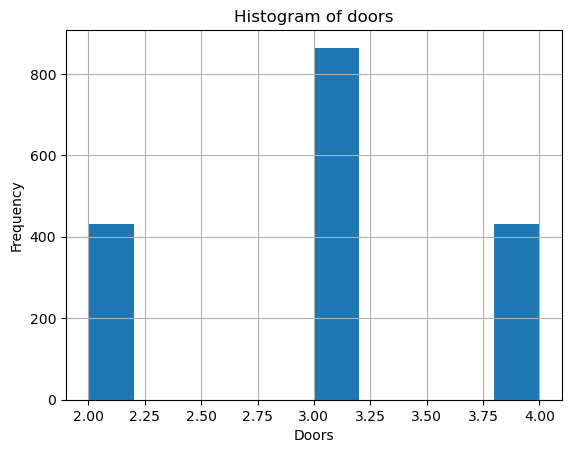

In [40]:
df["doors"].hist(bins=10)
# plt.hist(df["doors"],bins=10)
plt.title("Histogram of doors")
plt.xlabel("Doors")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Plot bar of buying, maint, lug_boot, safety using 4X4 subplots - 3 Marks
#num_bins = 10


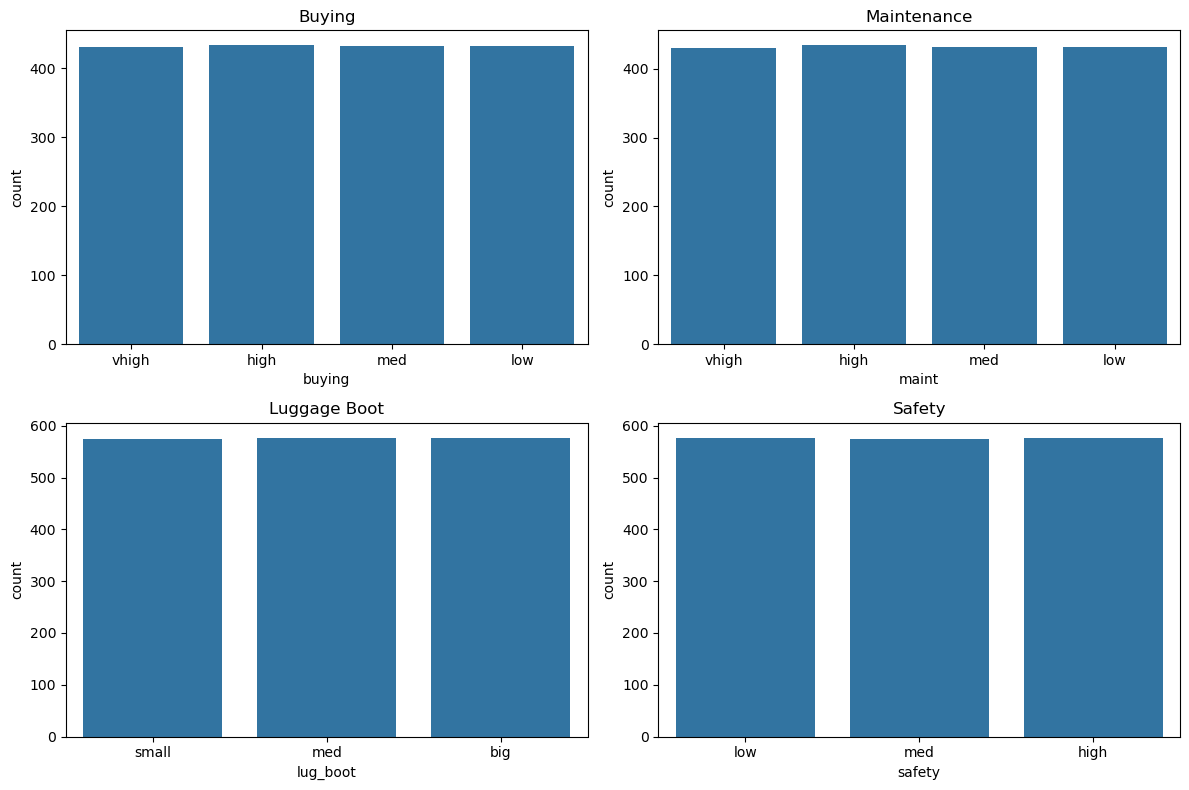

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x="buying", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Buying")

sns.countplot(x="maint", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Maintenance")

sns.countplot(x="lug_boot", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Luggage Boot")

sns.countplot(x="safety", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Safety")

plt.tight_layout()
plt.show()


In [ ]:
#Pie chart based on Car acceptability grouping - 1 Marks


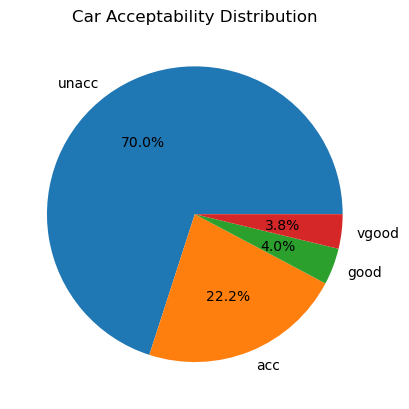

In [41]:
df['car_acceptability'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Car Acceptability Distribution")
plt.ylabel("")
plt.show()

In [ ]:
#Replace the value 5more and more with 5 in doors column - 1 Marks


In [42]:
df["doors"].replace("5more","5",inplace=True)
# df["doors"].replace("more",5)
df["doors"].unique()

array([2., 3., 4.])

In [ ]:
#Apply label encoder for categorical columns -  2 Marks


In [43]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for cols in categorical_cols:
    df[cols]=LE.fit_transform(df[cols])
df.head()

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,3,3,2.0,2.0,2,1,2
1,3,3,2.0,2.0,2,2,2
2,3,3,2.0,2.0,2,0,2
3,0,3,2.0,2.0,1,1,2
4,3,0,2.0,2.0,1,2,2


In [44]:
#Prepare X - input matrix and y - label vector - 1 Mark
X=df.drop(["car_acceptability"],axis=1)
y=df["car_acceptability"]

In [ ]:
# Split the data into train and test set  - use test size = 30% and random state = 4 : - 2 Marks


In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# Importing decision tree classifier from sklearn library and fit the classifier on training data - 3 Marks
#Use proper values for the depth and criterion parameters


In [48]:


from sklearn.tree import DecisionTreeClassifier 

DE = DecisionTreeClassifier(max_depth=3)
model = DE.fit(X_train, y_train)


In [50]:
#Make predictions on test data - 1 Marks
y_pred=model.predict(X_test)

In [ ]:
# Check the evaluation metrics of the model - Confusion Matrix, Accuracy, Precision, Recall, F1 score - 3 Marks


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      0.51      0.65       204
           1       0.00      0.00      0.00         0
           2       0.83      0.95      0.89       315
           3       0.00      0.00      0.00         0

    accuracy                           0.78       519
   macro avg       0.43      0.37      0.38       519
weighted avg       0.85      0.78      0.79       519



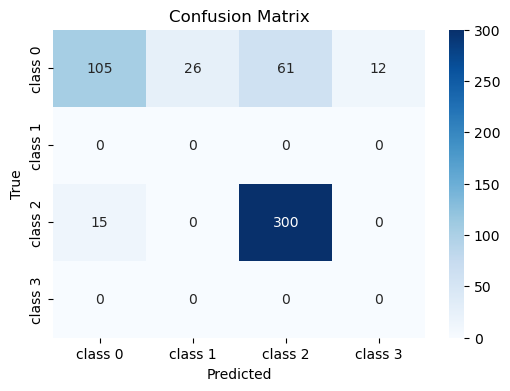

In [55]:
# from sklearn.metrics import accuracy,precision,recall,f1_score,confusion_matrix 
# from sklearn.metrics import Classification_report
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_pred,y_test)
print(report)
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['class 0','class 1','class 2','class 3'],yticklabels=['class 0','class 1','class 2','class 3'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Draw the decision tree - 1 marks


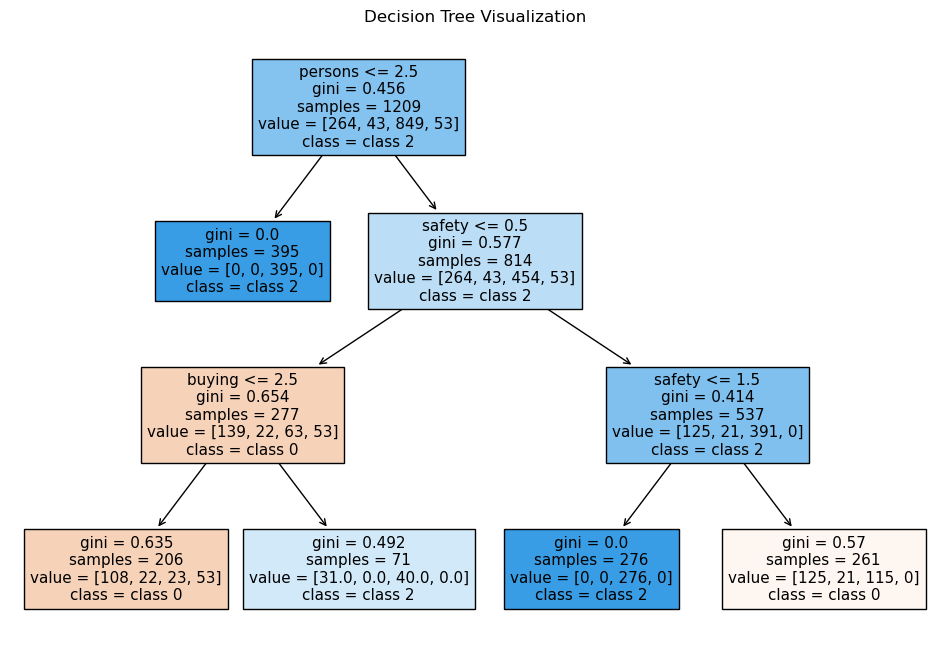

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=X_train.columns,class_names=['class 0','class 1','class 2','class 3'])
plt.title("Decision Tree Visualization")
plt.show()